In [1]:
#hide
#default_exp examples.complex_dummy_experiment_manager
from nbdev.showdoc import *
from block_types.utils.nbdev_utils import nbdev_setup, TestRunner

nbdev_setup ()
tst = TestRunner (targets=['dummy'])

# Complex Dummy Experiment Manager

> Dummy experiment manager with features that allow additional functionality

In [2]:
#export
from hpsearch.examples.dummy_experiment_manager import DummyExperimentManager, FakeModel
import hpsearch
import os
import shutil
import os

import hpsearch.examples.dummy_experiment_manager as dummy_em
from hpsearch.visualization import plot_utils 

In [3]:
#for tests
import pytest
from block_types.utils.nbdev_utils import md

## ComplexDummyExperimentManager

In [4]:
#export
class ComplexDummyExperimentManager (DummyExperimentManager):
    
    def __init__ (self, model_file_name='model_weights.pk', **kwargs):
        super().__init__ (model_file_name=model_file_name, **kwargs)
        self.raise_error_if_run = False

    def run_experiment (self, parameters={}, path_results='./results'):
        
        # useful for testing: in some cases the experiment manager should not call run_experiment
        if self.raise_error_if_run:
            raise RuntimeError ('run_experiment should not be called')
            
        # extract hyper-parameters used by our model. All the parameters have default values if they are not passed.
        offset = parameters.get('offset', 0.5)   # default value: 0.5
        rate = parameters.get('rate', 0.01)   # default value: 0.01
        epochs = parameters.get('epochs', 10) # default value: 10
        noise = parameters.get('noise', 0.0)
        if parameters.get('actual_epochs') is not None:
            epochs = parameters.get('actual_epochs')
        
        # other parameters that do not form part of our experiment definition
        # changing the values of these other parameters, does not make the ID of the experiment change
        verbose = parameters.get('verbose', True)
        
        # build model with given hyper-parameters
        model = FakeModel (offset=offset, rate=rate, epochs=epochs, noise = noise, verbose=verbose)
        
        # load training, validation and test data (fake step)
        model.load_data()

        # start from previous experiment if indicated by parameters
        path_results_previous_experiment = parameters.get('prev_path_results')
        if path_results_previous_experiment is not None:
            model.load_model_and_history (path_results_previous_experiment)
        
        # fit model with training data 
        model.fit ()
        
        # save model weights and evolution of accuracy metric across epochs
        model.save_model_and_history(path_results)
        
        # simulate ctrl-c
        if parameters.get ('halt', False):
            raise KeyboardInterrupt ('stopped')
        
        # evaluate model with validation and test data
        validation_accuracy, test_accuracy = model.score()
        
        # store model
        self.model = model
        
        # the function returns a dictionary with keys corresponding to the names of each metric. 
        # We return result on validation and test set in this example
        dict_results = dict (validation_accuracy = validation_accuracy,
                             test_accuracy = test_accuracy)
        
        return dict_results
    

### Usage

In [5]:
#exports tests.examples.test_complex_dummy_experiment_manager
def test_complex_dummy_experiment_manager ():
    #em = generate_data ('complex_dummy_experiment_manager')
    
    md (
'''
Extend previous experiment by using a larger number of epochs

We see how to create a experiment that is the same as a previous experiment, 
only increasing the number of epochs. 

1.a. For test purposes, we first run the full number of epochs, 30, take note of the accuracy, 
and remove the experiment
'''
    )
    
    em = ComplexDummyExperimentManager (path_experiments='test_complex_dummy_experiment_manager', 
                                        verbose=0)
    em.create_experiment_and_run (parameters = {'epochs': 30});
    reference_accuracy = em.model.accuracy
    reference_weight = em.model.weight

    from hpsearch.config.hpconfig import get_path_experiments
    import os
    import pandas as pd

    path_experiments = get_path_experiments ()
    print (f'experiments folders: {os.listdir(f"{path_experiments}/experiments")}\n')

    experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
    print ('csv data')
    display (experiments_data)

    md ('we plot the history')
    from hpsearch.visualization.experiment_visualization import plot_multiple_histories

    plot_multiple_histories ([0], run_number=0, op='max', backend='matplotlib', metrics='validation_accuracy')

    md ('1.b. Now we run two experiments: ')

    md ('We run the first experiment  with 20 epochs:')

    # a.- remove previous experiment
    em.remove_previous_experiments()

    # b.- create first experiment with epochs=20
    em.create_experiment_and_run (parameters = {'epochs': 20});

    print (f'experiments folders: {os.listdir(f"{path_experiments}/experiments")}\n')

    experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
    print ('csv data')
    display(experiments_data)
    print (f'weight: {em.model.weight}, accuracy: {em.model.accuracy}')

    md ('We run the second experiment resumes from the previous one and increases the epochs to 30')
    # 4.- create second experiment with epochs=10
    em.create_experiment_and_run (parameters = {'epochs': 30}, 
                              other_parameters={'prev_epoch': True,
                                               'name_epoch': 'epochs',
                                               'previous_model_file_name': 'model_weights.pk'});

    experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
    print ('csv data')
    display(experiments_data)

    new_accuracy = em.model.accuracy
    new_weight = em.model.weight

    assert new_weight==reference_weight
    assert new_accuracy==reference_accuracy

    print (f'weight: {new_weight}, accuracy: {new_accuracy}')

    md ('We plot the history')
    plot_multiple_histories ([1], run_number=0, op='max', backend='matplotlib', metrics='validation_accuracy')
    
    em.remove_previous_experiments()

running test_complex_dummy_experiment_manager



Extend previous experiment by using a larger number of epochs

We see how to create a experiment that is the same as a previous experiment, 
only increasing the number of epochs. 

1.a. For test purposes, we first run the full number of epochs, 30, take note of the accuracy, 
and remove the experiment


write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class


fitting model with 30 epochs
epoch 0: accuracy: 0.51
epoch 1: accuracy: 0.52
epoch 2: accuracy: 0.53
epoch 3: accuracy: 0.54
epoch 4: accuracy: 0.55
epoch 5: accuracy: 0.56
epoch 6: accuracy: 0.5700000000000001
epoch 7: accuracy: 0.5800000000000001
epoch 8: accuracy: 0.5900000000000001
epoch 9: accuracy: 0.6000000000000001
epoch 10: accuracy: 0.6100000000000001
epoch 11: accuracy: 0.6200000000000001
epoch 12: accuracy: 0.6300000000000001
epoch 13: accuracy: 0.6400000000000001
epoch 14: accuracy: 0.6500000000000001
epoch 15: accuracy: 0.6600000000000001
epoch 16: accuracy: 0.6700000000000002
epoch 17: accuracy: 0.6800000000000002
epoch 18: accuracy: 0.6900000000000002
epoch 19: accuracy: 0.7000000000000002
epoch 20: accuracy: 0.6900000000000002
epoch 21: accuracy: 0.6800000000000002
epoch 22: accuracy: 0.6700000000000002
epoch 23: accuracy: 0.6600000000000001
epoch 24: accuracy: 0.6500000000000001
epoch 25: accuracy: 0.6400000000000001
epoch 26: accuracy: 0.6300000000000001
epoch 27: ac

,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,30.0,0.6,0.5,0.005837,22:48:15.301502,True


we plot the history

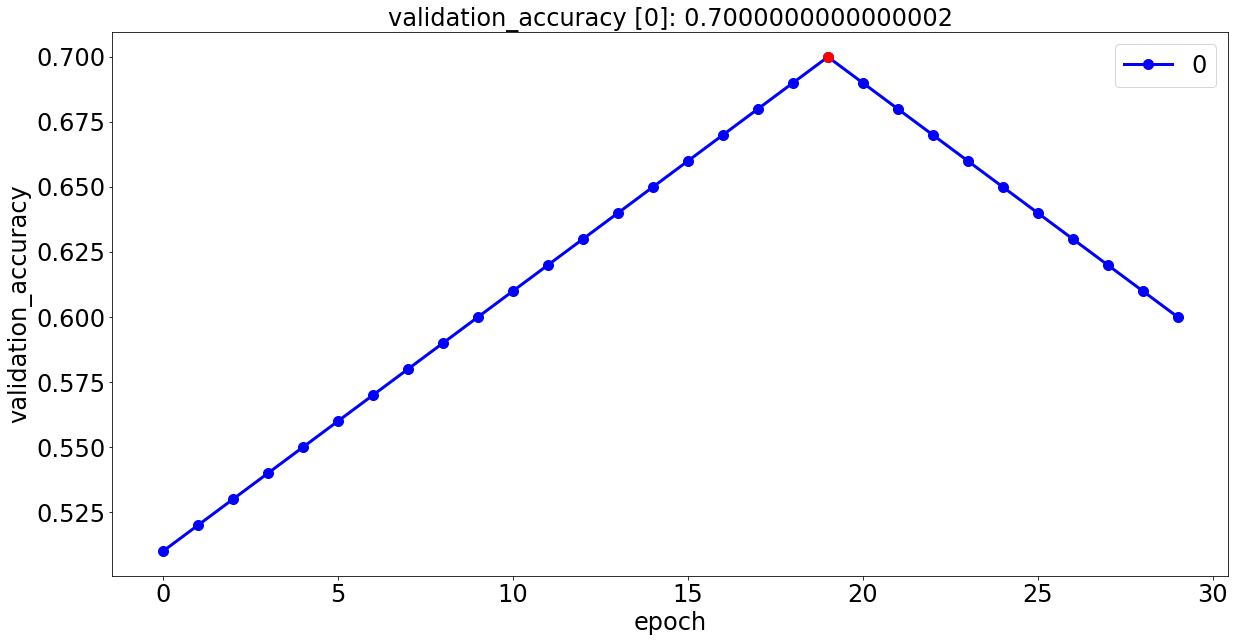

,validation_accuracy
0,0.7


1.b. Now we run two experiments: 

We run the first experiment  with 20 epochs:

write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class


fitting model with 20 epochs
epoch 0: accuracy: 0.51
epoch 1: accuracy: 0.52
epoch 2: accuracy: 0.53
epoch 3: accuracy: 0.54
epoch 4: accuracy: 0.55
epoch 5: accuracy: 0.56
epoch 6: accuracy: 0.5700000000000001
epoch 7: accuracy: 0.5800000000000001
epoch 8: accuracy: 0.5900000000000001
epoch 9: accuracy: 0.6000000000000001
epoch 10: accuracy: 0.6100000000000001
epoch 11: accuracy: 0.6200000000000001
epoch 12: accuracy: 0.6300000000000001
epoch 13: accuracy: 0.6400000000000001
epoch 14: accuracy: 0.6500000000000001
epoch 15: accuracy: 0.6600000000000001
epoch 16: accuracy: 0.6700000000000002
epoch 17: accuracy: 0.6800000000000002
epoch 18: accuracy: 0.6900000000000002
epoch 19: accuracy: 0.7000000000000002
experiments folders: ['00000']

csv data


,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,20.0,0.7,0.6,0.002601,22:48:15.872303,True


weight: 0.20000000000000004, accuracy: 0.7000000000000002


We run the second experiment resumes from the previous one and increases the epochs to 30

write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class


reading model from test_complex_dummy_experiment_manager/experiments/00000/0/model_weights.pk
fitting model with 10 epochs
epoch 0: accuracy: 0.6900000000000002
epoch 1: accuracy: 0.6800000000000002
epoch 2: accuracy: 0.6700000000000002
epoch 3: accuracy: 0.6600000000000001
epoch 4: accuracy: 0.6500000000000001
epoch 5: accuracy: 0.6400000000000001
epoch 6: accuracy: 0.6300000000000001
epoch 7: accuracy: 0.6200000000000001
epoch 8: accuracy: 0.6100000000000001
epoch 9: accuracy: 0.6000000000000001
csv data


,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,20.0,0.7,0.6,0.002601,22:48:15.872303,True
1,30.0,0.6,0.5,0.002112,22:48:15.914683,True


weight: 0.3000000000000001, accuracy: 0.6000000000000001


We plot the history

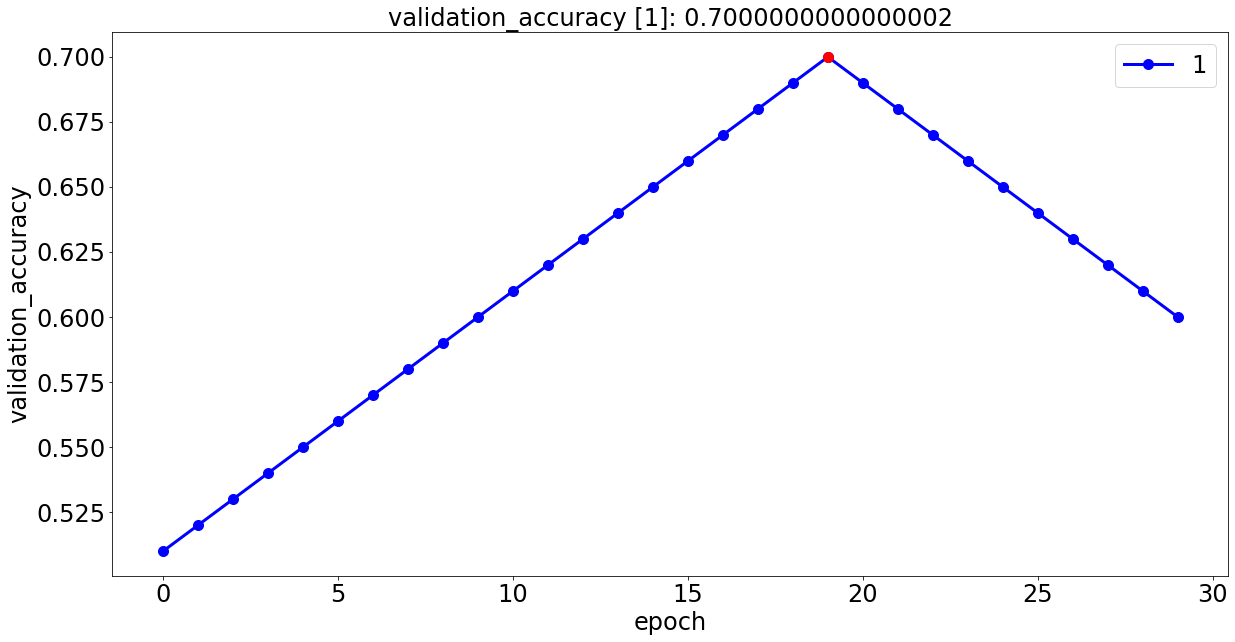

,validation_accuracy
1,0.7


In [6]:
tst.run (test_complex_dummy_experiment_manager, tag='dummy')

## Running experiments and removing experiments

In [7]:
# export
def run_multiple_experiments (**kwargs):
    dummy_em.run_multiple_experiments (EM=ComplexDummyExperimentManager, **kwargs)

def remove_previous_experiments ():
    dummy_em.remove_previous_experiments (EM=ComplexDummyExperimentManager)

In [8]:
#export
def generate_data (name_folder):
    em = ComplexDummyExperimentManager (path_experiments=f'test_{name_folder}', verbose=0)
    em.remove_previous_experiments ()
    run_multiple_experiments (em=em, nruns=5, noise=0.1, verbose=False)
    return em